In [91]:
import numpy as np
import gdown
import PIL 
from PIL import Image
from IPython.display import display
import matplotlib.pyplot as plt
from glob import glob
import random
import cv2
import warnings
import ultralytics
import os
from ultralytics import YOLO
warnings.simplefilter('ignore')

In [82]:
# Load the model
yolo_model = YOLO('yolov8m.pt')

100%|██████████| 49.7M/49.7M [00:00<00:00, 105MB/s] 


In [90]:
# Download the images from the google drive

googldrive_url = 'https://drive.google.com/uc?id=179DFjTRrYNi2h9Umxei4uXeqEsg19Lvh'

directory = os.path.join(os.getcwd(), 'down_loadimages','images.zip')

gdown.download(googldrive_url, directory, quiet=False)


Downloading...
From (original): https://drive.google.com/uc?id=179DFjTRrYNi2h9Umxei4uXeqEsg19Lvh
From (redirected): https://drive.google.com/uc?id=179DFjTRrYNi2h9Umxei4uXeqEsg19Lvh&confirm=t&uuid=07c0f986-f4ee-4788-9961-0988feef7b22
To: c:\Users\jegullin\Downloads\code11\project_final\down_loadimages\file.zip
100%|██████████| 1.86G/1.86G [00:11<00:00, 160MB/s] 


'c:\\Users\\jegullin\\Downloads\\code11\\project_final\\down_loadimages\\file.zip'

In [66]:
# Set the path to the data
data = os.path.join(os.getcwd(), 'data', 'labels_train.csv')
imagepath = os.path.join(os.getcwd(), 'data', 'images')

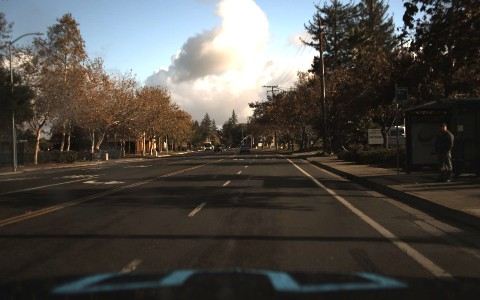

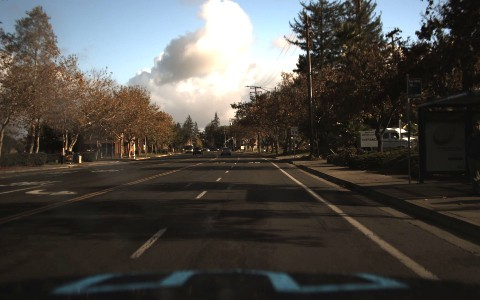

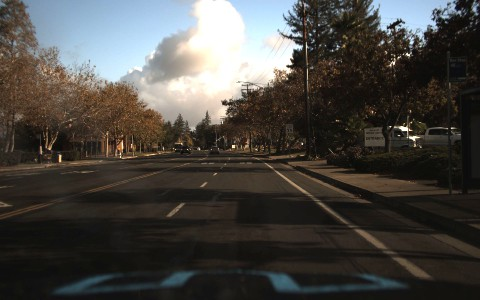

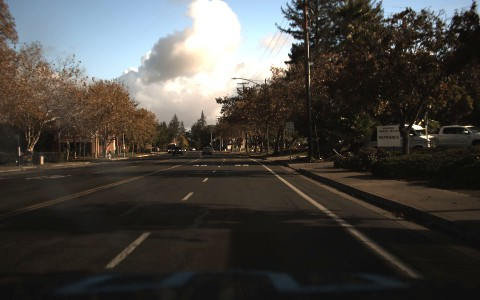

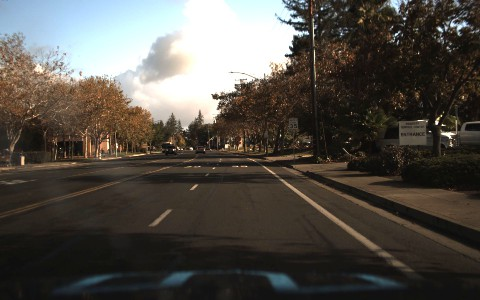

In [67]:
# Show the first 5 images
images = glob(imagepath + '/*')
for i in range(5):
    img = Image.open(images[i])
    display(img)

In [69]:
# Create a list to store the images
images = []
for i in range(num_samples):
    # Load the image
    yolo_outputs = yolo_model.predict(random_image[i])
    # Get the output
    output = yolo_outputs[0]
    # Get the boxes, names and confidence
    box = output.boxes
    names = output.names
    
    # Loop through the boxes
    for j in range(len(box)):
        labels = names[box.cls[j].item()]
        coordinates = box.xyxy[j].tolist()
        confidence = np.round(box.conf[j].item(), 2)
        #print(f'In this image {len(box)} objects has been detected.')
        print(f'Object {j + 1} is: {labels}')
        print(f'Coordinates are: {coordinates}')
        print(f'Confidence is: {confidence}')
        print('-------')
        
    # Store the image in the 'images' list
    images.append(output.plot()[:, :, ::-1])



WARNING  inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

image 1/22241 c:\Users\jegullin\Downloads\code11\project_final\data\images\1478019952686311006.jpg: 416x640 1 person, 1 car, 841.2ms
image 2/22241 c:\Users\jegullin\Downloads\code11\project_final\data\images\1478019953180167674.jpg: 416x640 1 car, 840.6ms
image 3/22241 c:\Users\jegullin\Downloads\code11\project_final\data\images\1478019953689774621.jpg: 416x640 1 car, 836.4ms
image 4/22241 c:\Users\jegullin\Downloads\code11\project_final\data\images\1478